# **Executive Summary**

**Background:**

The dataset that was provided gives a detailed information about house sale prices in Ames, Iowa. The objective of this project is to develop a predictive model to estimate house sale prices for new, unseen data accurately.

This project involves the following steps:

**1. Data Pre-Processing:** In this step, the data is explored to get to know about the data in which missing values has been handled, conversion of data is seen and data is prepared by one-hot encoding. Exploratory Data Analysis(EDA) is done to visualize and understand the patterns, relationships, anomalies, etc. Feature engineering of the data is done to create more meaningful representations of the data.

**2. Modeling:** We tried 2 simple models, simple linear regression (SLR) and ridge regression to fit the data.

**3. Overfitting vs. Underfitting:** Through ridge regression (1), the concept of overfitting and underfitting is shown. An increase in the Alpha led to underfitting, and decrease of Alpha led to overfitting

**4. Final model:** At the end ridge (1) fits the data well compared to SLR, because the RMSE of ridge is 32070.81 whereas the RMSE for SLR model is 36575.66.

**Results:**
Ridge regression model (1) served as the final model to predict house prices. The choice for a ridge model(1) was based on its simplicity and decent accuracy in relation to this dataset. The predictions generated can now be evaluated against actual prices, if available, to measure the model's effectiveness.

#**Table of contents**

**1. Data Pre-processing**

> 1.1 Data Exploration

> 1.2 Data Cleaning & Preprocessing

*   1.2.1. Handling Missing Values
*   1.2.2. Data Type Conversion
*   1.2.3. Data Preparation (Encoding Categorical Variables)

> 1.3 Exploratory Data Analysis(EDA)

*  1.3.1. Distribution of the Target Variable (SalePrice)

> 1.4 Feature Engineering

*   1.4.1. Feature Generation


> 1.5 Data Splitting

**2. Model Building**
> 2.1 Building a Linear Regression Model

**3. Overfitting vs. Underfitting**
> 3.1 Demonstration of Overfitting vs Underfitting

**4. Final Model**
> 4.1 Model Training

> 4.2 Final model built

> 4.3 Ridge Regression

> 4.4 GridsearchCV



**5. References**



# **1. Data Pre-Processing**

**1.1 Data Exploration**

This helps to get a sense of the data, its columns, types, and some basic statistics.

**Actions:**

**1. Loading the Data with Pandas:** Use the Python library called Pandas to read the CSV file and transform it into a DataFrame. A DataFrame is a 2-dimensional table structure that Pandas uses, similar to an Excel spreadsheet.

**2. Viewing the First Few Rows:** The head() method is to see the first few rows of the DataFrame. This gives a quick overview of the data columns and initial entries.

**3. Summary Statistics:** The describe() method provides statistics like mean, median, and count for numerical columns.

**4. Checking Data Types & Missing Values:**With info(), the data type of each column and the number of non-null (i.e., non-missing) values can be known.

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('Housing_Data_Train.csv')

# Display the first few rows of the dataset
df.head(3)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900


In [ ]:
# Use df.describe() to generate summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500000,288.819436,0.0,249.75,499.5,749.25,999.0
Id,1000.0,725.853000,422.179162,1.0,353.75,732.5,1089.50,1455.0
MSSubClass,1000.0,58.165000,43.579318,20.0,20.00,50.0,70.00,190.0
LotFrontage,814.0,70.120393,25.730561,21.0,59.00,70.0,80.00,313.0
LotArea,1000.0,10778.454000,11647.964726,1477.0,7559.50,9544.5,11475.75,215245.0
OverallQual,1000.0,6.088000,1.365328,1.0,5.00,6.0,7.00,10.0
OverallCond,1000.0,5.578000,1.108668,1.0,5.00,5.0,6.00,9.0
YearBuilt,1000.0,1970.550000,30.609908,1872.0,1953.00,1972.0,2000.00,2009.0
YearRemodAdd,1000.0,1984.620000,20.682296,1950.0,1966.75,1993.0,2004.00,2010.0
MasVnrArea,994.0,100.989940,169.554306,0.0,0.00,0.0,167.50,1115.0


In [ ]:
# Use df.info() to get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Id             1000 non-null   int64  
 2   MSSubClass     1000 non-null   int64  
 3   MSZoning       1000 non-null   object 
 4   LotFrontage    814 non-null    float64
 5   LotArea        1000 non-null   int64  
 6   Street         1000 non-null   object 
 7   Alley          66 non-null     object 
 8   LotShape       1000 non-null   object 
 9   LandContour    1000 non-null   object 
 10  Utilities      1000 non-null   object 
 11  LotConfig      1000 non-null   object 
 12  LandSlope      1000 non-null   object 
 13  Neighborhood   1000 non-null   object 
 14  Condition1     1000 non-null   object 
 15  Condition2     1000 non-null   object 
 16  BldgType       1000 non-null   object 
 17  HouseStyle     1000 non-null   object 
 18  OverallQu

In [ ]:
#Reading test data
df_test=pd.read_csv('/content/Housing_Data_Test.csv')
df_test.head(2)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1,1,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [ ]:
#Describing test data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,446.0,222.500000,128.893367,0.0,111.25,222.5,333.75,445.0
Id,446.0,741.132287,422.985821,2.0,384.00,721.5,1101.75,1460.0
MSSubClass,446.0,54.473094,39.699749,20.0,20.00,50.0,70.00,190.0
LotFrontage,373.0,69.445040,20.198086,21.0,60.00,69.0,80.00,138.0
LotArea,446.0,9725.715247,3865.641637,1300.0,7508.75,9225.5,11632.25,32463.0
OverallQual,446.0,6.096413,1.314444,2.0,5.00,6.0,7.00,10.0
OverallCond,446.0,5.594170,1.121340,2.0,5.00,5.0,6.00,9.0
YearBuilt,446.0,1972.713004,28.990245,1880.0,1956.00,1974.5,2000.00,2010.0
YearRemodAdd,446.0,1985.430493,20.378737,1950.0,1968.00,1994.0,2004.00,2010.0
MasVnrArea,444.0,100.621622,183.819573,0.0,0.00,0.0,153.75,1600.0


In [ ]:
# Use df.columns to print column names
print(df.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

**1.2 Data Cleaning & Preprocessing**

**1.2.1. Handling Missing Values:** From the given dataset, certain columns had missing values. Addressing these columns by either filling them or dropping them, depending on the nature of the data and the amount of missing data is done.


~ Counting Null Values of each column in the given data set.

In [ ]:
Col_Names=list(df.columns)
Null_val_count=list(df.isnull().sum())
Only_Null_Count=[]
for i in zip(Col_Names, Null_val_count):
  if i[1]!=0:
    Only_Null_Count.append(i)
print(Only_Null_Count)

[('LotFrontage', 186), ('Alley', 934), ('MasVnrType', 6), ('MasVnrArea', 6), ('BsmtQual', 25), ('BsmtCond', 25), ('BsmtExposure', 26), ('BsmtFinType1', 25), ('BsmtFinType2', 26), ('Electrical', 1), ('FireplaceQu', 465), ('GarageType', 61), ('GarageYrBlt', 61), ('GarageFinish', 61), ('GarageQual', 61), ('GarageCond', 61), ('PoolQC', 995), ('Fence', 815), ('MiscFeature', 964)]


~ As dropping all the rows that consists Null Values, looks unpractical, because the dataset turns into a shape of 0 rows and 81 columns, which indicates that one should follow a different approach rather than dropping all the Null values.

In [ ]:
#df.dropna drops the null values
df.dropna()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


~ Plotting a bar graph with the Null values of each column to visualize how many null values are present in each column

In [ ]:
#Splitting the null value counts into two separate lists for plotting them
x=[]
y=[]
for i in Only_Null_Count:
  x.append(i[0])
  y.append(i[1])
print(x)
print(y)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
[186, 934, 6, 6, 25, 25, 26, 25, 26, 1, 465, 61, 61, 61, 61, 61, 995, 815, 964]


Text(0.5, 1.0, '# of Null Values in Each Column')

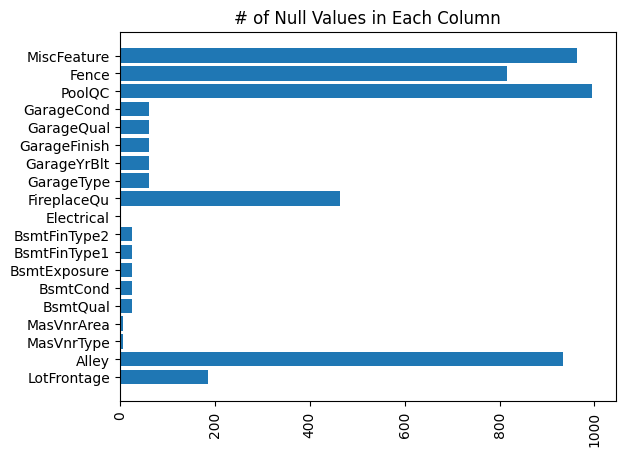

In [ ]:
#Plot of the Null Values present in each column
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.barh(x,y)
plt.xticks(rotation=90)
plt.title('# of Null Values in Each Column')

~ Based on the above plot, dropping and imputing the Null Values. For example, if considered the Alley column, there are almost 96% of missing values, so the column is dropped, which is having high percentage of Null Values and with lower percentage values, one can impute with mean, median or mode.

In [ ]:
# Funtion to check null values
def checkNull(dataset):
    nullfeatures = (dataset.isnull().sum()).sort_values(ascending=0)
    nullfeatures = nullfeatures[nullfeatures>0]
    return nullfeatures

~ Dealing with Null Values in training data set.

In [ ]:
# Drop columns with a large number of missing values
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
# Fill missing values for columns where it makes sense
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrType'].fillna('NaN', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['BsmtQual'].fillna('NaN', inplace=True)
df['BsmtCond'].fillna('NaN', inplace=True)
df['BsmtExposure'].fillna('NaN', inplace=True)
df['BsmtFinType1'].fillna('NaN', inplace=True)
df['BsmtFinType2'].fillna('NaN', inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['FireplaceQu'].fillna('NaN', inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['GarageFinish'].fillna('NaN', inplace=True)
df['GarageQual'].fillna('NaN', inplace=True)
df['GarageCond'].fillna('NaN', inplace=True)
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [ ]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

~ Dealing with Null Values in test data set.

In [ ]:
df_test['MasVnrType'].fillna('NaN', inplace=True)
df_test['BsmtQual'].fillna('NaN', inplace=True)
df_test['BsmtCond'].fillna('NaN', inplace=True)
df_test['BsmtExposure'].fillna('NaN', inplace=True)
df_test['BsmtFinType1'].fillna('NaN', inplace=True)
df_test['BsmtFinType2'].fillna('NaN', inplace=True)
df_test['FireplaceQu'].fillna('NaN', inplace=True)
df_test['GarageFinish'].fillna('NaN', inplace=True)
df_test['GarageQual'].fillna('NaN', inplace=True)
df_test['GarageCond'].fillna('NaN', inplace=True)


In [ ]:
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [ ]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(), inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0], inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(), inplace=True)

In [ ]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

**1.2.2. Data Type Conversion:** Ensure data types for each column are appropriate. Convert certain numeric columns that represent categorical data.

~ MSSubClass has been converted from numeric to string because even though it's a numerical value, it represents as a string data type.

In [ ]:
# Convert 'MSSubClass' from numeric to string as it represents types of dwelling and is categorical
df['MSSubClass'] = df['MSSubClass'].astype(str)
df_test['MSSubClass']=df['MSSubClass'].astype(str)

~ Relationship between Id and SalePrice is almost a constant relationship (As one could see from the below scatter plot as we move along the X-axis the salesPrice remains almost constant). So, we can decide to remove this feature from the both train and test datasets. Here x axis represents the Id and y axis represents the sale prices.

Pearson Correlation between House Id and Sale Price: -0.05321167918024494


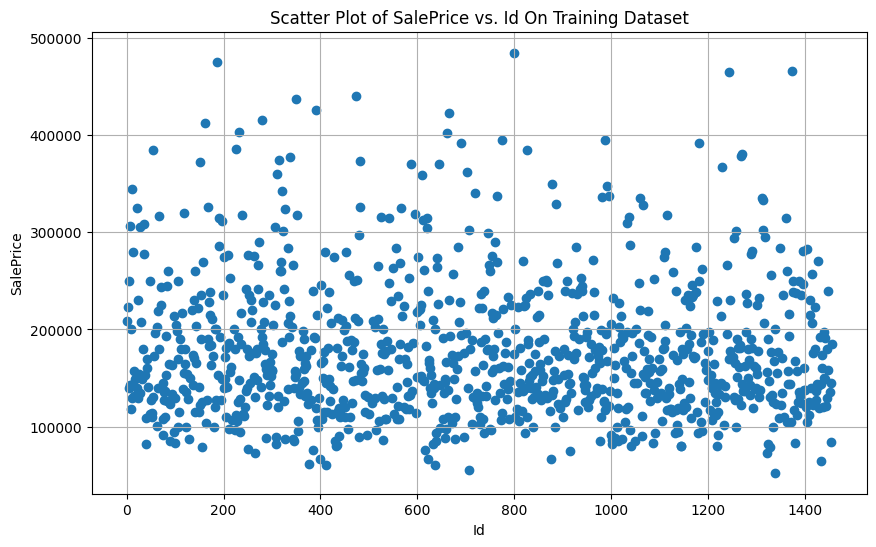

In [ ]:
print("Pearson Correlation between House Id and Sale Price:",df.Id.corr(df.SalePrice))
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df['Id'], df['SalePrice'])  # Add transparency for better visibility
plt.title('Scatter Plot of SalePrice vs. Id On Training Dataset')
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.grid(True)  # Add grid lines for better readability
plt.show()

~ Since there is no relation, Id feature is being dropped.

In [ ]:
df.drop(columns=['Unnamed: 0','Id'],inplace=True)
df_test.drop(columns=['Unnamed: 0','Id'],inplace=True)

~ Since these columns were removed from training set we are removing them from the test set as well.

In [ ]:
#Dropping Null Values in test data set
df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

~ Dividing the data into Ordinal and nonOrdinal data to convert the categorical datatype into numerical datatype to represent one-hot encoding.

In [ ]:
#nanWithMeaning = ['GarageType', 'GarageFinish', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','GarageQual','BsmtFinType1','FireplaceQu','BsmtQual','BsmtCond']
nonOrdinal = ['MSSubClass','MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
              'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical',
              'GarageType','PavedDrive','SaleType','SaleCondition']
ordinal = ['LotShape','LandContour', 'Utilities', 'LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
           'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond']

#print the length of the ordinal and nonOrdinal datatypes
print(len(ordinal+nonOrdinal))

40


**1.2.3. Data Preparation (Encoding Categorical Variables):** Convert categorical columns into a format that can be provided to machine learning algorithms to improve model accuracy. We'll use One-hot encoding here.

 ~ Mapping the data according to the categorical features to convert into numerical features for ordinal data.

In [ ]:
# Declaration of the data
# Ordinal mapping
ordinal_mapping = {
    #LotShape
    'Reg': 1,
    'IR1': 2,
    'IR2': 3,
    'IR3': 4,
    'NaN': 0,

    #ExterCond,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,

    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,

    #BsmtFinType1,2
    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinished

    'Typ': 7,   # Typical Functionality
    'Min1': 6,  # Minor Deductions 1
    'Min2': 5,  # Minor Deductions 2
    'Mod': 4,   # Moderate Deductions
    'Maj1': 3,  # Major Deductions 1
    'Maj2': 2,  # Major Deductions 2
    'Sev': 1,   # Severely Damaged
    'Sal': 0,   # Salvage only

    'Fin': 3,  # Finished
    'RFn': 2,  # Rough Finished
    'Unf': 1,  # Unfinished

    'GdPrv': 4,  # Good Privacy
    'MnPrv': 3,  # Minimum Privacy
    'GdWo': 2,   # Good Wood
    'MnWw': 1,   # Minimum Wood/Wire

    # Land Slope
    'Gtl': 3,
    'Mod': 2,
    'Sev': 1,

    # LandContour
    'Lvl':4,
    'Bnk':3,
    'HLS':2,
    'Low':1,

    # Utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1
}

In [ ]:
#Actual conversion of data from categorical to numerical datatype in test or validation data set
for column in ordinal:
    df_test[column] = df_test[column].map(ordinal_mapping)

In [ ]:
#Checking Null Values in test or validation data set
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [ ]:
##Actual conversion of data from categorical to numerical datatype in train data set
for column in ordinal:
    df[column] = df[column].map(ordinal_mapping)
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [ ]:
#Finding information of the test or validation dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     446 non-null    object 
 1   MSZoning       446 non-null    object 
 2   LotFrontage    446 non-null    float64
 3   LotArea        446 non-null    int64  
 4   Street         446 non-null    object 
 5   LotShape       446 non-null    int64  
 6   LandContour    446 non-null    int64  
 7   Utilities      446 non-null    int64  
 8   LotConfig      446 non-null    object 
 9   LandSlope      446 non-null    int64  
 10  Neighborhood   446 non-null    object 
 11  Condition1     446 non-null    object 
 12  Condition2     446 non-null    object 
 13  BldgType       446 non-null    object 
 14  HouseStyle     446 non-null    object 
 15  OverallQual    446 non-null    int64  
 16  OverallCond    446 non-null    int64  
 17  YearBuilt      446 non-null    int64  
 18  YearRemodA

In [ ]:
#Finding number of rows and columns in the test or validaton data set
df_test.shape

(446, 75)

~  Mapping the data according to the categorical features to convert into numerical features for nonOrdinal data. Get Dummies method was used to convert the left over categorical data.

In [ ]:
#Clubbing the 2 datasets (train & test data sets) to convert  categorical features into dummies
df_concated=pd.concat([df,df_test],ignore_index=True)
df_concated=pd.get_dummies(df_concated)
df_concated.shape

(1446, 228)

In [ ]:
df_concated.shape

(1446, 228)

~ Here, splitting of the concatenated data into train and test data set is done. The test data which is segregated is used to predict the sale prices at the end, where as the train data will be split into train (80%) and validation data (20%).

In [ ]:
# Test dataset
dfTest = df_concated[df_concated['SalePrice'].isnull()]
dfTest.drop(columns=['SalePrice'],inplace=True)

#Train dataset
df_concated.dropna(subset = ['SalePrice'], inplace = True)
dfTrain = df_concated.copy()
print(dfTrain.shape,dfTest.shape)

(1000, 228) (446, 227)


<ipython-input-73-07eb069b9fd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest.drop(columns=['SalePrice'],inplace=True)


**1.3 Exploratory Data Analysis(EDA)**

The goal of EDA is to visualize and understand the patterns, relationships, anomalies, etc., in the data. It's an important step before model building, as it can provide insights that might inform modeling decisions.

**1.3.1. Distribution of the Target Variable (SalePrice):** Looking at the distribution of target variable, SalePrice, is to understand its spread, central tendency, and shape.

This code will plot a histogram of SalePrice, allowing to see its distribution. The kde=True argument also plots a Kernel Density Estimate, giving a smoothed version of the histogram.

A histogram is a graphical representation of the distribution of a dataset. By visualizing the distribution of SalePrice, skewness, kurtosis, and outliers can be viewed. The Kernel Density Estimate provides a smooth curve which can make it easier to identify the distribution shape.

~ Plotting of a histogram which represents the distribution of the sale prices in which x axis represents the sale price and y axis represents the counts.

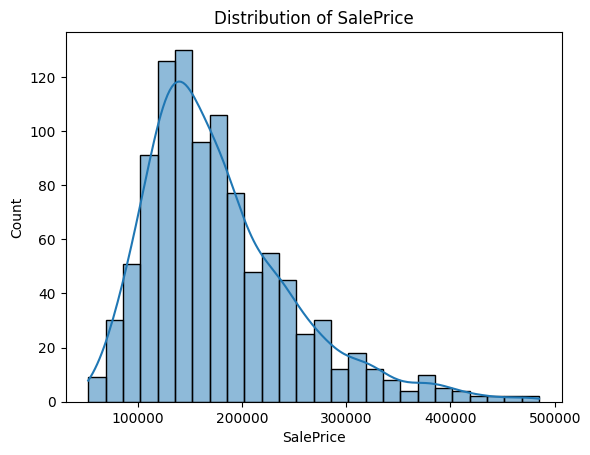

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


**1.4 Feature Engineering**

Feature engineering involves transforming or generating new features (columns) to improve the model's performance or to create more meaningful representations of the data.

**1.4.1. Feature Generation:** Creation of a new feature that represents the total area of the house by adding 1stFlrSF, 2ndFlrSF, and TotalBsmtSF.

The idea here is to combine the areas from different parts of the house to get a comprehensive feature that represents the overall size of the house. Bigger houses might generally be priced higher, making this a potentially useful feature.

In [ ]:
dfTrain['TotalArea'] = dfTrain['1stFlrSF'] + dfTrain['2ndFlrSF'] + dfTrain['TotalBsmtSF']
dfTest['TotalArea'] = dfTest['1stFlrSF'] + dfTest['2ndFlrSF'] + dfTest['TotalBsmtSF']

<ipython-input-75-9f54c2ef5633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['TotalArea'] = dfTest['1stFlrSF'] + dfTest['2ndFlrSF'] + dfTest['TotalBsmtSF']


**1.5 Data Splitting**

Before going into model building, it's important to split the data into training and testing sets. This ensures that the model on one subset of the data is trained and then test its predictive capability on a separate, unseen subset.

The primary purpose behind splitting data is to evaluate the model's performance on unseen data. This way, its generalization capability can be accessed. Here, splitting of the concatenated data into train and test data set is done.

In [ ]:
#df.shape tells us the number of rows of and columns of the processed data here.
df.shape

(1000, 76)

 ~ Now, the train data is being splitted into train and validation data sets in 80% and 20% respectively.

In [ ]:
#Splitting of the data into train and test or validation data sets
from sklearn.model_selection import train_test_split
# Define X (features) and y (target)
X = dfTrain.drop('SalePrice', axis=1)
y = dfTrain['SalePrice']


In [ ]:
# Splitting the dataset into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#**2.Model Building**

Now, with data prepared, model building is done. Linear regression, a fundamental technique in statistics and machine learning, serves as starting point for regression tasks.

**2.1 Building a Linear Regression Model**: Linear regression establishes a relationship between the dependent variable and one or more independent variables. It will provide with a linear equation that can be used for predictions.

*   Splits the data into training and testing sets.
*   Initializes a linear regression model.
*   Trains the model using the training data.
*   Makes predictions on both training and testing or validation data.
*   Calculates and prints out the mean squared error (a measure of how close the predictions are to the actual values) and Root mean squared error(RMSE) (a measure of how well the model explains the variance in the data) for both training and testing sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate MSE
mse = mean_squared_error(y_val, y_pred, squared=False)
print(f'Root Mean Squared Error on Validation Set: {mse}')

Root Mean Squared Error on Validation Set: 36575.660350856495


#**3. Overfitting vs Underfitting**

**3.1 Demonstration of Overfitting vs Underfitting**

*   Overfitting occurs when a model learns the training data too well,including its noise and outliers, leading to poor generalization to new, unseen data.
*  Underfitting happens when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and validation sets.

Demonstration is done through ridge regression model. (1)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'alpha': [0.001,0.01, 0.1, 1, 10, 100,1000]
}

# Create a Ridge regressor
ridge = Ridge()

# Setup grid search
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_parameters)

NameError: ignored

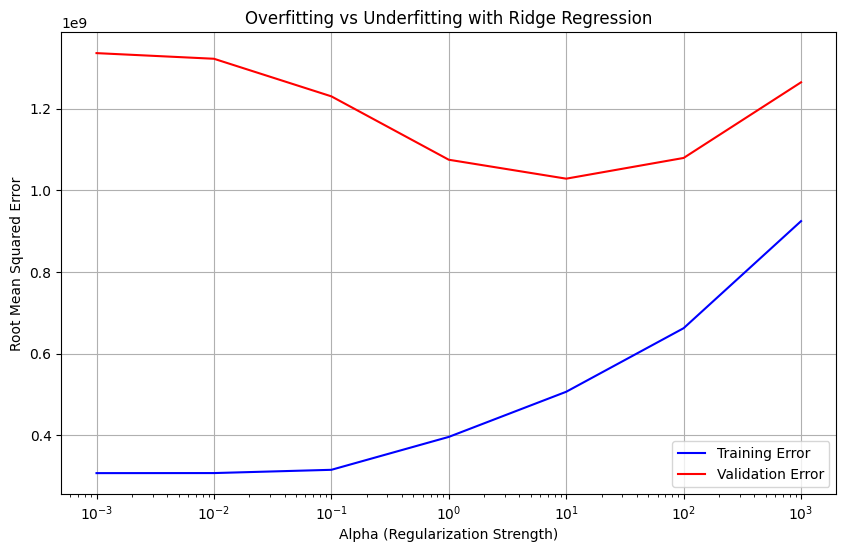

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample data split (ensure you have X and y from your dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.001,0.01, 0.1, 1, 10, 100,1000]  # using log scale for better visualization
train_errors = []
val_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    y_train_pred = ridge.predict(X_train)
    y_val_pred = ridge.predict(X_val)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Training Error", color='blue')
plt.plot(alphas, val_errors, label="Validation Error", color='red')
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Root Mean Squared Error")
plt.title("Overfitting vs Underfitting with Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

X axis represents the Alpha (Regularization Strength) and the Y axis represents the Mean squared error.

*   Underfit -> when the model at higher alphas (100, 1000) the rmse increases with alpha and we know that in case of underfit the model doesn't perform well on the train dataset.

*   Overfit -> When the model performs well on the train dataset, but not good at test data which is overfiiting (We could see at lower alphas (at 0.001, 0.01, 0.1) even though model performs well on the training data, but it doesn't perform good at test dataset.

*  But when alpha = 10, we could see model is reasonable good at training set (even though it is has a slight higher mse compared to model with alpha = 0.1, but we could see that the model performs better at testing dataset. This is the sweet point which we could find from the gridsearch CV (alpha = 10).(2)



#**4. Final Model**

After understanding the balance between overfitting and underfitting, the goal is to select the model with best parameters that generalizes well to new data.

**4.1 Model Training:** Using the entire training dataset, the training of the model is done.

**Model Choice:** Here a ridge regression model (1) is opted for the final prediction. This model provides a balance between model complexity and predictive power, based on earlier exploration of the data.


**4.2 Hyperparameter tuning**: Hyperparameter tuning optimizes a model's performance by adjusting certain settings which are not learned from the training data. In Ridge Regression (1), the primary hyperparameter is the regularization strength, denoted as λ. Proper tuning of λ is important to prevent overfitting and achieve optimal performance. Methods like Grid Search (2) are often employed to find the best λ value. Evaluating performance on a validation set during tuning ensures the λ generalizes well to unseen data.



**4.3 Final model built**

In [ ]:
ridge = Ridge(alpha=10)
model_ridge=ridge.fit(X_train,y_train)
predictions=model_ridge.predict(dfTest)

In [ ]:
y_val_pred = model_ridge.predict(X_val)
#train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred, squared=False)
val_mse

32070.813505768358

In [ ]:
#convert the predictions to a LIST of POSITIVE INTEGERS (do not submit decimals!)
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[200886, 154975, 118805, 154960, 114375, 246998, 63975, 168256, 139310, 153794, 131293, 296190, 277658, 181411, 158213, 412548, 131310, 166927, 220930, 66091, 113243, 187693, 181063, 197059, 124715, 102465, 195320, 192549, 191794, 121860, 105916, 141154, 324817, 228247, 181026, 172867, 141491, 142944, 215729, 222258, 155500, 169382, 202345, 106612, 136430, 115237, 126619, 232315, 286845, 168951, 256173, 144853, 155191, 200239, 166287, 196943, 129033, 195190, 136794, 158672, 113597, 138599, 133118, 122749, 222452, 240025, 199607, 223334, 278171, 104288, 226876, 227239, 85095, 235886, 169642, 215929, 102693, 204681, 98157, 158471, 139715, 186519, 230133, 253803, 125286, 260403, 261649, 134190, 300049, 181501, 170025, 193482, 344444, 132790, 163073, 78373, 121021, 229245, 141590, 59169, 239149, 133476, 310157, 172092, 142588, 124393, 214058, 136647, 252351, 320122, 230320, 222227, 52879, 149973, 110885, 141844, 153680, 211172, 278041, 288945, 265637, 205413, 300943, 136526, 99674, 219234,

~ The LIST of POSITIVE INTEGERS has been copied and pasted into a Python function called "my_answer_list()".

~The function like

def my_answer_list():
    return [200886, 154975, 118805, 154960, 114375, 246998, 63975, 168256, 139310, 153794, 131293, 296190, 277658, 181411, 158213, 412548, 131310, 166927, 220930, 66091, 113243, 187693, 181063, 197059, 124715, 102465, 195320, 192549, 191794, 121860, 105916, 141154, 324817, 228247, 181026, 172867, 141491, 142944, 215729, 222258, 155500, 169382, 202345, 106612, 136430, 115237, 126619, 232315, 286845, 168951, 256173, 144853, 155191, 200239, 166287, 196943, 129033, 195190, 136794, 158672, 113597, 138599, 133118, 122749, 222452, 240025, 199607, 223334, 278171, 104288, 226876, 227239, 85095, 235886, 169642, 215929, 102693, 204681, 98157, 158471, 139715, 186519, 230133, 253803, 125286, 260403, 261649, 134190, 300049, 181501, 170025, 193482, 344444, 132790, 163073, 78373, 121021, 229245, 141590, 59169, 239149, 133476, 310157, 172092, 142588, 124393, 214058, 136647, 252351, 320122, 230320, 222227, 52879, 149973, 110885, 141844, 153680, 211172, 278041, 288945, 265637, 205413, 300943, 136526, 99674, 219234, 170335, 132131, 190212, 130079, 201821, 160775, 249290, 165804, 111383, 188643, 200631, 142304, 346608, 130612, 93907, 181887, 151161, 344339, 176521, 134142, 214660, 154677, 266819, 137612, 247654, 165177, 135138, 154320, 153193, 365190, 237341, 131757, 396519, 98665, 245789, 202124, 138438, 200280, 112853, 142324, 263638, 102957, 97042, 205963, 127307, 287610, 141051, 121344, 121494, 146768, 273176, 118178, 232044, 95736, 381400, 135994, 161485, 100681, 235508, 146740, 99058, 153144, 118066, 134406, 173672, 305722, 152713, 136934, 175182, 91320, 210231, 331851, 216331, 167559, 161276, 120289, 146815, 296628, 116643, 223704, 165604, 158697, 307479, 90570, 122010, 136600, 139011, 298231, 140552, 204769, 240525, 100857, 69486, 137332, 158173, 188899, 269524, 154237, 290290, 202742, 145715, 176528, 243610, 172690, 94476, 260125, 229759, 99261, 130207, 140233, 189834, 170137, 245399, 178037, 282015, 215579, 170220, 162905, 85110, 216540, 210327, 160956, 105727, 199341, 163925, 193332, 159374, 143348, 150366, 162195, 190583, 157723, 142375, 137575, 87881, 184242, 149128, 333645, 217908, 174198, 137335, 147581, 146297, 157340, 183271, 95715, 133596, 121144, 231138, 160728, 118307, 187088, 209586, 154473, 162019, 212860, 247125, 266072, 112953, 204965, 279658, 148353, 119289, 187885, 143397, 137320, 181799, 79966, 99495, 199900, 251287, 221906, 175800, 173592, 125448, 241585, 135606, 178099, 181397, 160854, 309785, 117259, 286862, 208200, 52321, 247322, 289108, 147898, 160720, 205670, 158403, 245528, 166097, 225292, 89427, 215662, 100351, 136064, 103331, 177496, 160447, 206111, 173591, 171660, 184086, 134310, 105614, 42427, 103112, 317139, 134936, 225699, 127590, 236227, 66721, 182846, 225337, 120440, 152939, 203366, 340154, 147136, 127928, 203351, 177302, 262300, 121854, 137366, 127839, 184192, 200221, 201433, 177763, 262820, 157371, 78240, 202622, 263195, 223909, 280150, 127426, 230916, 164086, 109342, 219745, 140189, 164749, 181360, 142895, 223719, 242731, 214168, 159292, 127493, 233725, 184972, 267492, 181387, 162978, 91257, 146992, 117044, 117423, 147880, 314690, 295890, 225867, 158578, 174655, 216796, 106835, 194694, 255205, 83499, 70009, 237596, 116058, 114056, 112661, 240722, 208276, 252750, 247224, 197244, 373213, 204953, 156207, 174734, 199216, 131010, 243939, 190490, 257591, 115507, 65840, 114781, 307073, 125960, 143872, 151966, 187829, 224660, 252163, 119244, 106787, 318167, 159993, 142160, 196271, 191267, 332567, 324159, 101717, 122116, 259741, 172566, 200430, 249973, 170285, 163025]

~This function is saved into a new file as "calculator.py" and submitted to leaderboard in Gradescope.

**4.4 Ridge Regression** (1)

*   Machine learning models can be overfitted or underfitted. So, regularization techniques prevent these extremes, optimizing the model fit to the test set.
*   Overfitting is when a model excessively learns from the data, capturing noise and critical patterns, causing poor performance on new data.
Underfitting is when a model doesn't capture the essential patterns in the data, leading to poor performance on both training and unseen data.

**Ridge regression** is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters. In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias

*   **Bias and Variance:**
Bias occurs in results when algorithms oversimplify, leading to underfitting and Variance shows how sensitive an algorithm is to specific datasets, with high variance leading to overfitting.
Achieving a balance between bias and variance yields an optimal model, known as the Bias-Variance Tradeoff.
*  **Mathematical Intuition Behind Ridge Regression with Alpha Regularization:**
Ridge regression introduces a penalty to the ordinary least squares loss function based on the sum of squared coefficients.

**Objective function:**
J(θ)=∣∣Y−Xθ∣∣²+α∣∣θ∣∣²

Where:
J(θ) represents the cost function.
Y is the actual output vector.
X is the design matrix or the input feature matrix.
θ stands for the coefficients or parameters of the model.
α is the regularization parameter, also known as the shrinkage parameter. A larger value of α results in greater regularization, pushing the coefficients more towards zero and potentially leading to a simpler model.

The penalty constrains the magnitude of coefficients, preventing them from reaching extremely large values, which is useful especially in the presence of multicollinearity.

*  **Regularization Techniques:**

->Ridge Regularization (Ridge Regression): Applies a penalty to the sum of squared coefficients.

->Lasso Regularization: Penalizes the sum of absolute coefficients.

->Elastic Net: Combines the penalties from L1 and L2 regularization, adjusted using an alpha parameter.
*   **Python Implementation:**
For each method, hyperparameter tuning is shown using GridSearchCV (2) to determine the best alpha value.

*   **Conclusion:** Models can experience underfitting or overfitting
where regularization combats these issues. The performance of these algorithms can be benchmarked using metrics like RMSE.



**4.4 Gridsearch** (2)

Machine learning is pivotal for data-driven decision-making. However, relying on a single algorithm isn't optimal. To enhance model performance, one should explore hyperparameters to achieve the best-performing model.

**Hyperparameters vs. Parameters:**

Parameters are variables used by machine learning algorithms to make predictions from historical data. They are estimated by optimization algorithms and not set manually. Hyperparameters are variables set by the user before the model is trained, guiding the learning process.

**Understanding Grid Search:**

It aims to determine the optimal hyperparameters for a model.
Instead of manual search, which is time-consuming, methods like Random Search and Grid Search were developed. GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model. It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations. It then evaluates each combination using cross-validation and selects the one that produces the best performance. GridSearchCV helps in automating the process of hyperparameter tuning, enhancing model performance, and avoiding manual trial-and-error. Grid Search evaluates every combination of specified hyperparameters to determine the best set, but it can be resource-intensive.

**Cross-Validation and GridSearchCV:**

Combines grid search with cross-validation, a method that splits the training data further to validate the model's performance.
The most popular type is K-fold Cross-Validation, where training data is divided into 'k' partitions and iteratively trained and validated.
Together, grid search and cross-validation can be time-consuming but ensure optimal hyperparameter selection.

**Applying GridSearchCV:**

The function requires primary arguments such as the estimator, param grid, scoring method, and number of folds for cross-validation.
Example given uses the HeartDiseaseUCI dataset to demonstrate hyperparameter tuning with the RandomForestClassifier.

**Conclusion:**

GridSearchCV is a critical tool for model selection post-data processing. While it may be resource-intensive, it's invaluable for achieving the best model performance.
It's beneficial to compare tuned and untuned models to gauge the impact of hyperparameter optimization.

#**5. References**

1. Regularization in Machine Learning. Author: ANURAG SINGH CHOUDHARY
Date: August 29, 2022 https://www.analyticsvidhya.com/blog/2022/08/regularization-in-machine-learning/

2. Tune Hyperparameters with GridSearchCV. Author: Rahul Shah. Published on: August 10th, 2023. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/